**Perguntas para serem respondidas**

-quais os gêneros desses 100 filmes?

-qual gênero mais possui filmes?

-quais os gêneros dos 10 melhores filmes?

-quais os 10 melhores filmes?

-quais os 5 anos que possuem mais de um filme entre os 100 melhores?

-quais os 5 anos mais antigos e os 5 mais recentes de lançamento?

-quantos filmes tem a mesma nota?


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df_filmes= pd.read_csv('imdb_movies_top_100.csv')

In [3]:
df_filmes

,Unnamed: 0,rank,title,description,genre,rating,id,year
0,0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994
1,1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972
2,2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008
3,3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974
4,4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957
...,...,...,...,...,...,...,...,...
95,95,96,Lawrence of Arabia,"The story of T.E. Lawrence, the English office...","['Adventure', 'Biography', 'Drama']",8.3,top96,1962
96,96,97,M,When the police in a German city are unable to...,"['Crime', 'Mystery', 'Thriller']",8.3,top97,1931
97,97,98,Come and See,"After finding an old rifle, a young boy joins ...","['Drama', 'Thriller', 'War']",8.4,top98,1985
98,98,99,North by Northwest,A New York City advertising executive goes on ...,"['Action', 'Adventure', 'Mystery']",8.3,top99,1959


In [4]:
df_filmes.columns

Index(['Unnamed: 0', 'rank', 'title', 'description', 'genre', 'rating', 'id',
       'year'],
      dtype='object')

In [5]:
df_filmes = df_filmes.drop('Unnamed: 0', axis=1)

In [6]:
df_filmes.head()

,rank,title,description,genre,rating,id,year
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957


In [7]:
df_filmes.shape

(100, 7)

In [8]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   id           100 non-null    object 
 6   year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [9]:
df_filmes.isnull().sum()

rank           0
title          0
description    0
genre          0
rating         0
id             0
year           0
dtype: int64

In [10]:
df_filmes.describe()

,rank,rating,year
count,100.000000,100.000000,100.000000
mean,50.500000,8.514000,1987.480000
std,29.011492,0.211307,22.876692
min,1.000000,8.300000,1931.000000
25%,25.750000,8.400000,1973.500000
50%,50.500000,8.500000,1994.000000
75%,75.250000,8.600000,2003.000000
max,100.000000,9.300000,2022.000000


In [11]:
object_columns =  df_filmes.select_dtypes(include=object)

In [12]:
object_columns.describe()

,title,description,genre,id
count,100,100,100,100
unique,100,100,57,100
top,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],top1
freq,1,1,7,1


**Podemos notar que cada filme possui mais de um gênero, para conseguirmos visualizar melhor vamos criar colunas com o nome de cada gênero, para cada filme que possui aquele gênero será atribuido o valor 1 e se ele não possuir será tribuido o valor 0.**

In [13]:
df_filmes['genre']

0                               ['Drama']
1                      ['Crime', 'Drama']
2            ['Action', 'Crime', 'Drama']
3                      ['Crime', 'Drama']
4                      ['Crime', 'Drama']
                     ...                 
95    ['Adventure', 'Biography', 'Drama']
96       ['Crime', 'Mystery', 'Thriller']
97           ['Drama', 'Thriller', 'War']
98     ['Action', 'Adventure', 'Mystery']
99     ['Mystery', 'Romance', 'Thriller']
Name: genre, Length: 100, dtype: object

In [14]:
unique_genres = set()
for genres in df_filmes['genre']:
    unique_genres.update(genres.split(', '))
unique_genres = list(unique_genres)


In [15]:
unique_genres

["['Western']",
 "'Crime'",
 "'Western']",
 "'Comedy'",
 "'Horror']",
 "'Family']",
 "'Romance'",
 "'Fantasy']",
 "'History']",
 "['Animation'",
 "['Crime'",
 "'Biography'",
 "'Comedy']",
 "'Thriller'",
 "'Adventure']",
 "'Family'",
 "'Musical'",
 "['Biography'",
 "['Drama'",
 "'Mystery']",
 "'War']",
 "'Action'",
 "'Romance']",
 "['Horror'",
 "['Action'",
 "['Adventure'",
 "'Adventure'",
 "['Drama']",
 "'Film-Noir']",
 "'Thriller']",
 "['Comedy'",
 "['Animation']",
 "'Drama'",
 "'Mystery'",
 "'Sci-Fi']",
 "'Drama']",
 "'Music']",
 "['Mystery'"]

In [16]:


unique_genres = ['Fantasy','Drama','Western','Adventure','Sci-Fi','Musical','Music','Mystery','Thriller','Animation','History','Action','Family','Comedy','Biography','Horror','Romance','Action','War','Film-Noir','Crime',]

quais os generos desses 100 filmes?

In [17]:



unique_genres

['Fantasy',
 'Drama',
 'Western',
 'Adventure',
 'Sci-Fi',
 'Musical',
 'Music',
 'Mystery',
 'Thriller',
 'Animation',
 'History',
 'Action',
 'Family',
 'Comedy',
 'Biography',
 'Horror',
 'Romance',
 'Action',
 'War',
 'Film-Noir',
 'Crime']

In [18]:
for genre in unique_genres:
    df_filmes[genre] = df_filmes['genre'].apply(lambda x: 1 if genre in x else 0)

In [19]:
#mostrar todas as linhas e colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_filmes

,rank,title,description,genre,rating,id,year,Fantasy,Drama,Western,Adventure,Sci-Fi,Musical,Music,Mystery,Thriller,Animation,History,Action,Family,Comedy,Biography,Horror,Romance,War,Film-Noir,Crime
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,Schindler's List,"In German-occupied Poland during World War II,...","['Biography', 'Drama', 'History']",9.0,top6,1993,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,7,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"['Action', 'Adventure', 'Drama']",9.0,top7,2003,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,8,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","['Crime', 'Drama']",8.8,top8,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,"['Action', 'Adventure', 'Drama']",8.8,top9,2001,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,"The Good, the Bad and the Ugly",A bounty hunting scam joins two men in an unea...,"['Adventure', 'Western']",8.8,top10,1966,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_filmes.columns = df_filmes.columns.str.lower()

In [21]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   title        100 non-null    object 
 2   description  100 non-null    object 
 3   genre        100 non-null    object 
 4   rating       100 non-null    float64
 5   id           100 non-null    object 
 6   year         100 non-null    int64  
 7   fantasy      100 non-null    int64  
 8   drama        100 non-null    int64  
 9   western      100 non-null    int64  
 10  adventure    100 non-null    int64  
 11  sci-fi       100 non-null    int64  
 12  musical      100 non-null    int64  
 13  music        100 non-null    int64  
 14  mystery      100 non-null    int64  
 15  thriller     100 non-null    int64  
 16  animation    100 non-null    int64  
 17  history      100 non-null    int64  
 18  action       100 non-null    int64  
 19  family   

In [22]:
df_filmes

,rank,title,description,genre,rating,id,year,fantasy,drama,western,adventure,sci-fi,musical,music,mystery,thriller,animation,history,action,family,comedy,biography,horror,romance,war,film-noir,crime
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,Schindler's List,"In German-occupied Poland during World War II,...","['Biography', 'Drama', 'History']",9.0,top6,1993,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,7,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"['Action', 'Adventure', 'Drama']",9.0,top7,2003,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,8,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","['Crime', 'Drama']",8.8,top8,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,"['Action', 'Adventure', 'Drama']",8.8,top9,2001,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,"The Good, the Bad and the Ugly",A bounty hunting scam joins two men in an unea...,"['Adventure', 'Western']",8.8,top10,1966,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
soma_dos_generos = df_filmes[['fantasy','drama','western','adventure','sci-fi','musical','music', 'mystery','thriller','animation','history','action', 'family' , 'comedy', 'biography', 'horror', 'romance' , 'war', 'film-noir', 'crime']].sum()

In [24]:
soma_dos_generos

fantasy       6
drama        69
western       3
adventure    27
sci-fi       11
musical       1
music         4
mystery      16
thriller     12
animation    10
history       2
action       24
family        3
comedy       12
biography     7
horror        3
romance      10
war           9
film-noir     1
crime        20
dtype: int64

-qual genero mais possui filmes?

<Axes: >

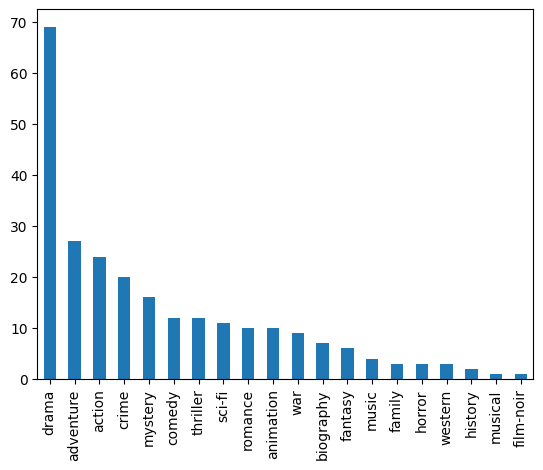

In [25]:
soma_dos_generos_sorted = soma_dos_generos.sort_values(ascending=False)
soma_dos_generos_sorted.plot.bar()

-quais os generos dos 10 melhores filmes?

In [26]:
dez_melhores_filmes = df_filmes.head(11)

In [27]:
dez_melhores_filmes

,rank,title,description,genre,rating,id,year,fantasy,drama,western,adventure,sci-fi,musical,music,mystery,thriller,animation,history,action,family,comedy,biography,horror,romance,war,film-noir,crime
0,1,The Shawshank Redemption,Two imprisoned men bond over a number of years...,['Drama'],9.3,top1,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,The Godfather,The aging patriarch of an organized crime dyna...,"['Crime', 'Drama']",9.2,top2,1972,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,The Dark Knight,When the menace known as the Joker wreaks havo...,"['Action', 'Crime', 'Drama']",9.0,top3,2008,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,4,The Godfather Part II,The early life and career of Vito Corleone in ...,"['Crime', 'Drama']",9.0,top4,1974,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,12 Angry Men,The jury in a New York City murder trial is fr...,"['Crime', 'Drama']",9.0,top5,1957,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,Schindler's List,"In German-occupied Poland during World War II,...","['Biography', 'Drama', 'History']",9.0,top6,1993,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,7,The Lord of the Rings: The Return of the King,Gandalf and Aragorn lead the World of Men agai...,"['Action', 'Adventure', 'Drama']",9.0,top7,2003,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,8,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","['Crime', 'Drama']",8.8,top8,1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,The Lord of the Rings: The Fellowship of the Ring,A meek Hobbit from the Shire and eight compani...,"['Action', 'Adventure', 'Drama']",8.8,top9,2001,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,"The Good, the Bad and the Ugly",A bounty hunting scam joins two men in an unea...,"['Adventure', 'Western']",8.8,top10,1966,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
generos_dez_melhores_filmes = dez_melhores_filmes[['fantasy','drama','western','adventure','sci-fi','musical','music', 'mystery','thriller','animation','history','action', 'family' , 'comedy', 'biography', 'horror', 'romance' , 'war', 'film-noir', 'crime']].sum()


In [29]:
generos_dez_melhores_filmes_sorted = generos_dez_melhores_filmes.sort_values(ascending=False)

In [30]:
generos_dez_melhores_filmes_sorted

drama        10
crime         5
adventure     3
action        3
romance       1
biography     1
history       1
western       1
mystery       0
thriller      0
animation     0
music         0
musical       0
family        0
comedy        0
sci-fi        0
horror        0
war           0
film-noir     0
fantasy       0
dtype: int64

In [31]:
generos_dez_melhores_filmes_sorted = pd.DataFrame(generos_dez_melhores_filmes_sorted)

In [32]:
generos_dez_melhores_filmes_sorted = generos_dez_melhores_filmes_sorted[(generos_dez_melhores_filmes_sorted != 0).any(axis=1)]


In [33]:
generos_dez_melhores_filmes_sorted

,0
drama,10
crime,5
adventure,3
action,3
romance,1
biography,1
history,1
western,1


<Axes: >

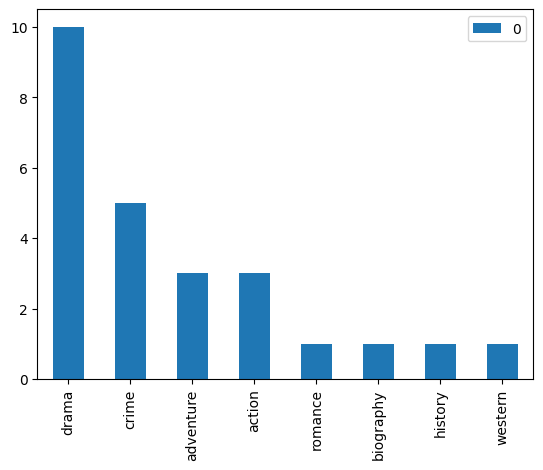

In [34]:
generos_dez_melhores_filmes_sorted.plot.bar()

quais os 10 melhores filmes?

In [35]:
df_filmes['title'].head(10)

0                             The Shawshank Redemption
1                                        The Godfather
2                                      The Dark Knight
3                                The Godfather Part II
4                                         12 Angry Men
5                                     Schindler's List
6        The Lord of the Rings: The Return of the King
7                                         Pulp Fiction
8    The Lord of the Rings: The Fellowship of the Ring
9                       The Good, the Bad and the Ugly
Name: title, dtype: object

quais os 5 anos que possuem mais de um filme entre os 100 melhores?

In [61]:
soma_filmes_por_ano = df_filmes.groupby('year')['title'].count()
soma_filmes_por_ano

year
1931    2
1936    1
1940    1
1941    1
1942    1
1946    1
1950    1
1952    1
1954    2
1957    3
1958    1
1959    1
1960    1
1962    2
1963    1
1964    1
1966    1
1968    2
1972    1
1974    1
1975    1
1977    1
1979    2
1980    2
1981    2
1983    1
1984    2
1985    2
1986    1
1988    2
1990    1
1991    2
1992    1
1993    1
1994    6
1995    4
1997    3
1998    2
1999    4
2000    3
2001    2
2002    3
2003    2
2004    1
2006    2
2008    2
2009    2
2010    2
2011    1
2012    3
2014    2
2016    1
2017    1
2018    3
2019    3
2022    1
Name: title, dtype: int64

<Axes: xlabel='year'>

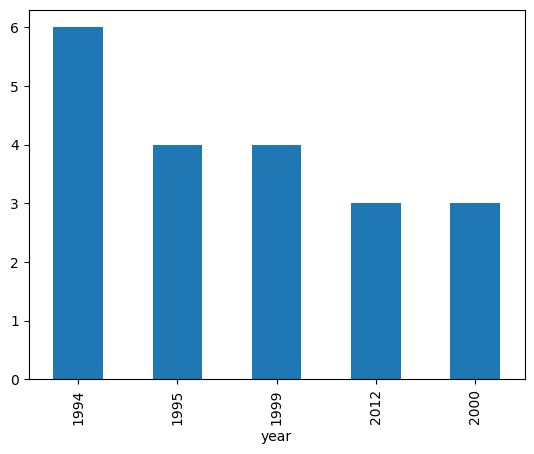

In [62]:
soma_filmes_por_ano_sorted = soma_filmes_por_ano.sort_values(ascending=False)
soma_filmes_por_ano_sorted.head(5).plot.bar()

quais os 5 anos mais antigos e os 5 mais recentes de lançamento?

In [70]:
filmes_por_ano.head(5)

year
1931    2
1936    1
1940    1
1941    1
1942    1
Name: title, dtype: int64

In [72]:
filmes_por_ano.tail(5)

year
2016    1
2017    1
2018    3
2019    3
2022    1
Name: title, dtype: int64

-quantos filmes tem a mesma nota?

In [75]:
filmes_por_nota = df_filmes.groupby('rating')['title'].count()
filmes_por_nota

rating
8.3    21
8.4    27
8.5    21
8.6    12
8.7     5
8.8     7
9.0     5
9.2     1
9.3     1
Name: title, dtype: int64

<Axes: xlabel='rating'>

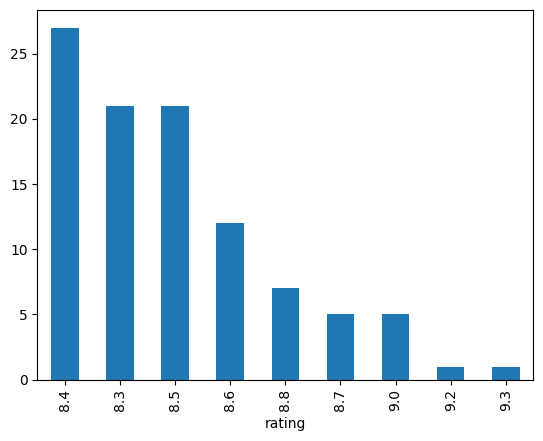

In [80]:
filmes_por_nota_sorted = filmes_por_nota.sort_values(ascending=False)
filmes_por_nota_sorted.plot.bar()